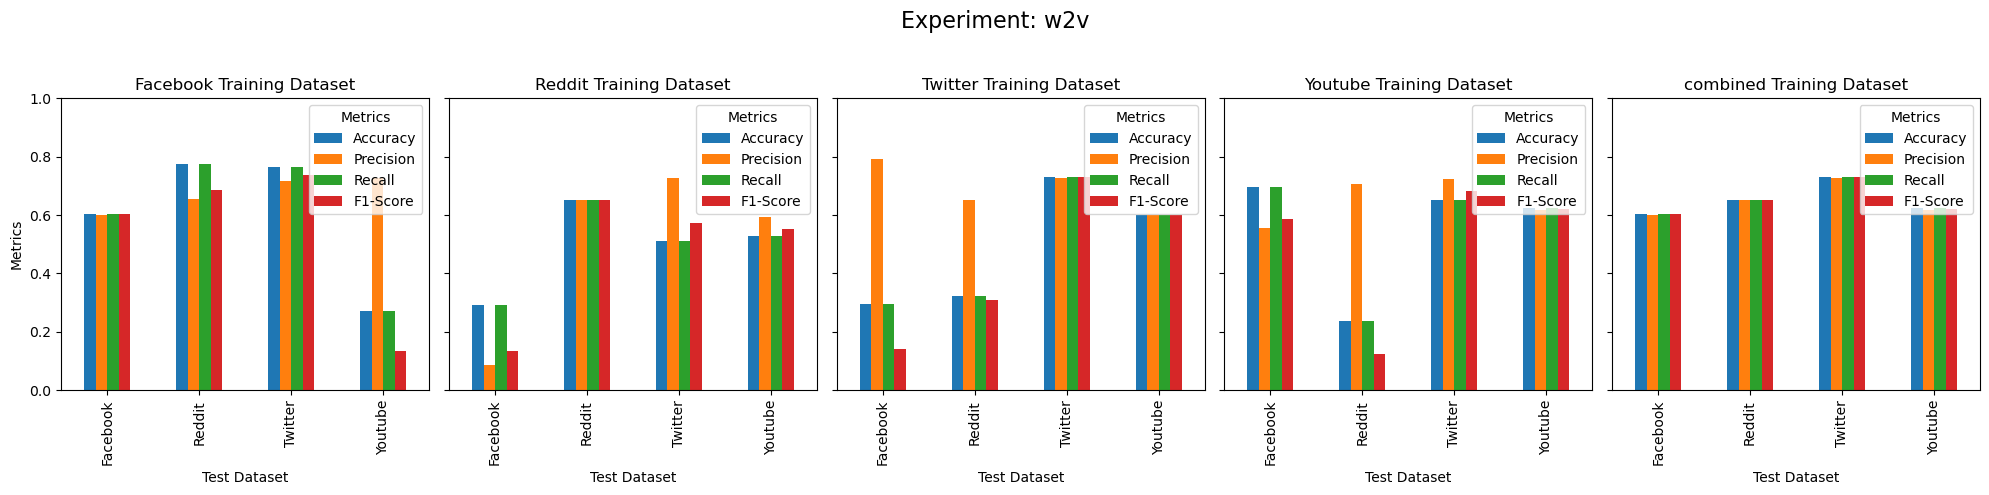

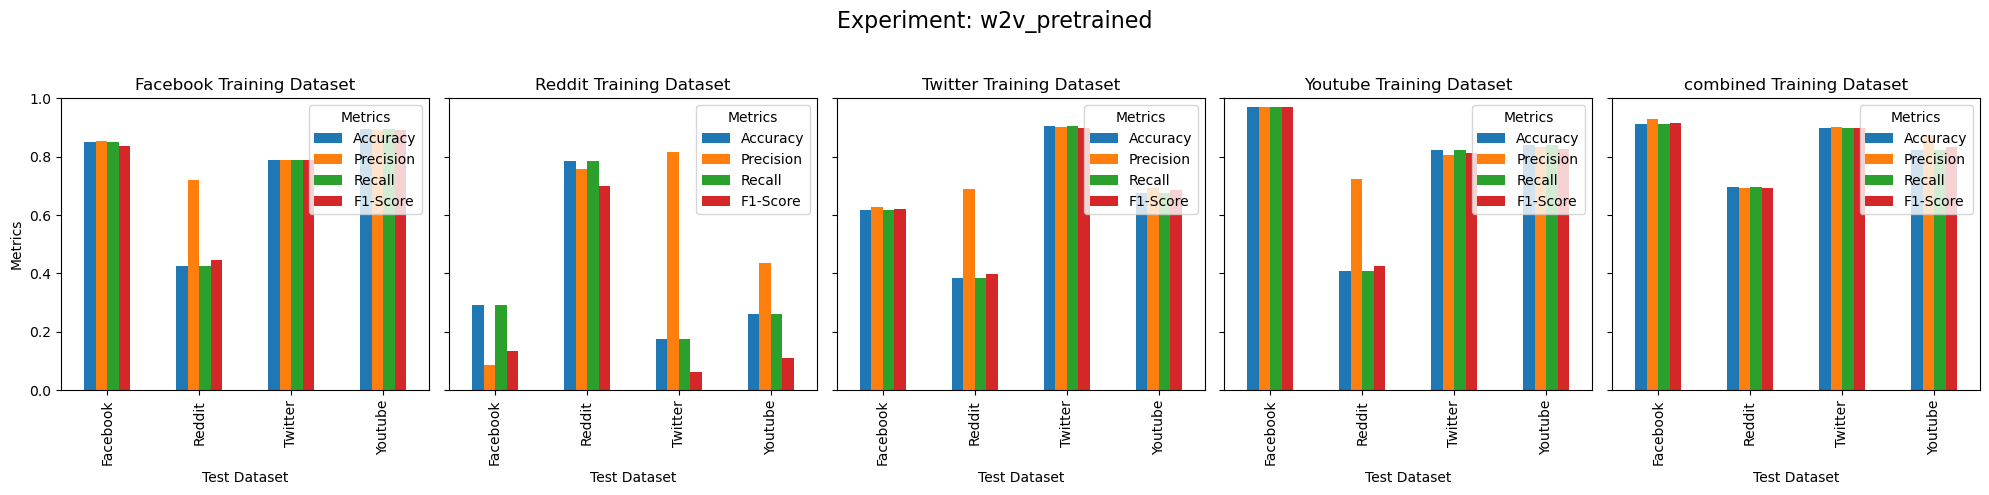

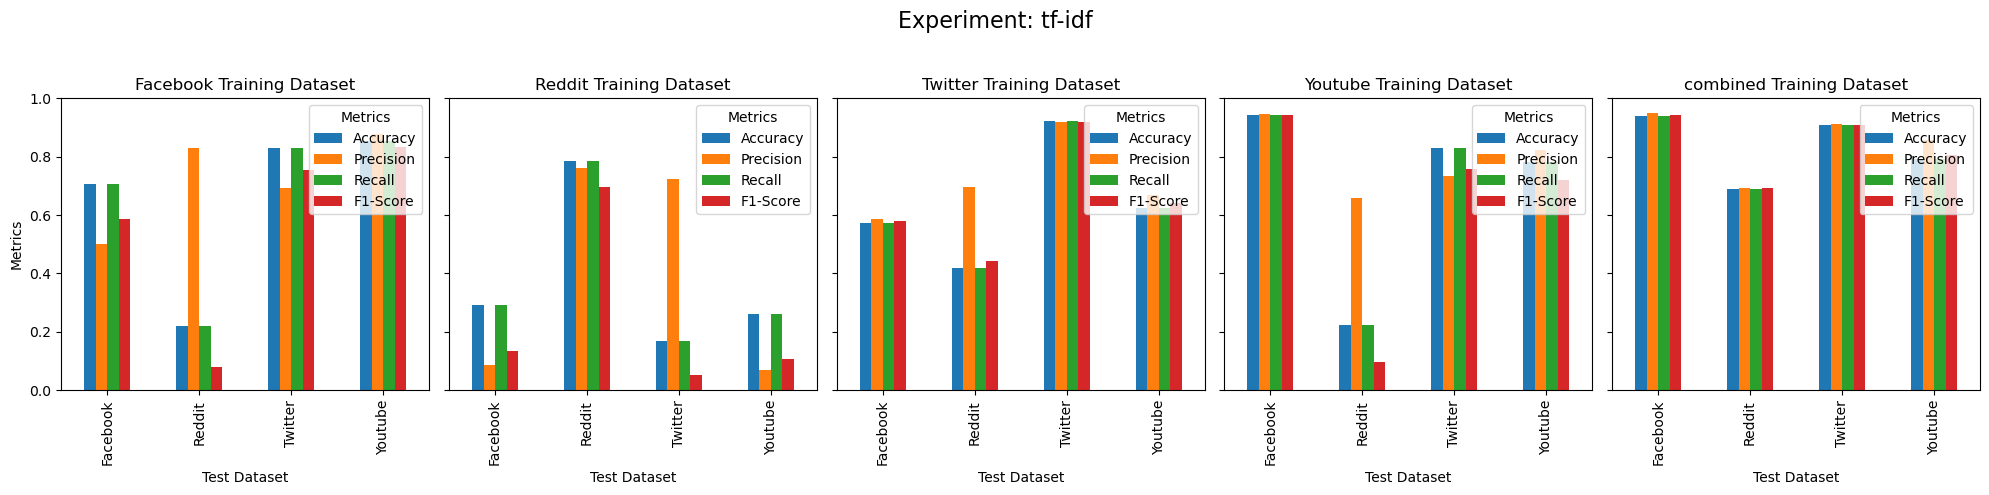

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary of filenames (key: name of the test, value: filename)
filenames = {
    'w2v': 'w2v_classification_results.csv',
    'w2v_pretrained': 'w2v_pretrained_classification_results.csv',
    'tf-idf': 'tfidf_classification_results.csv'
}

# Load the data for each filename
dataframes = {name: pd.read_csv(filename) for name, filename in filenames.items()}

# Metrics to plot in the desired order
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create plots for each experiment
for exp_name, df in dataframes.items():
    # Filter the overall class metrics
    df_overall = df[df['Class'] == 'overall']
    
    # Create a figure for the histograms
    fig, axs = plt.subplots(1, len(df_overall['Train Dataset'].unique()), figsize=(20, 5), sharey=True)
    fig.suptitle(f'Experiment: {exp_name}', fontsize=16)
    
    for i, train_dataset in enumerate(df_overall['Train Dataset'].unique()):
        # Filter data for the current train dataset
        train_data = df_overall[df_overall['Train Dataset'] == train_dataset]
        
        # Rearrange the data to ensure the desired order of metrics
        plot_data = pd.DataFrame()
        for metric in metrics:
            plot_data[metric] = train_data.pivot(index='Test Dataset', columns='Train Dataset', values=metric)[train_dataset]
        
        # Plot the histogram for each metric
        plot_data.plot(kind='bar', ax=axs[i])
        axs[i].set_title(f'{train_dataset} Training Dataset')
        axs[i].set_xlabel('Test Dataset')
        axs[i].set_ylabel('Metrics')
        axs[i].legend(loc='upper right', title='Metrics')
        axs[i].set_ylim(0, 1)

    # Adjust the layout
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the figure
    plt.savefig(f'{exp_name}_metrics_histogram.png')

# Show the plots
plt.show()
